In [1]:
import numpy as np,random, operator, pandas as pd, matplotlib.pyplot as plt
from notebook.services.config import ConfigManager
import time



In [2]:
class Ciudad:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def Distancia(self, Ciudad):
        xDis = abs(self.x - Ciudad.x)
        yDis = abs(self.y - Ciudad.y)
        Distancia = np.sqrt((xDis ** 2) + (yDis ** 2))
        return Distancia
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [3]:
class Fitness:
    def __init__(self, Ruta):
        self.Ruta = Ruta
        self.Distancia = 0
        self.fitness= 0.0
    
    def RutaDistancia(self):
        if self.Distancia ==0:
            DistanciaCamino = 0
            for i in range(0, len(self.Ruta)):
                DesdeCiudad = self.Ruta[i]
                HaciaCiudad = None
                if i + 1 < len(self.Ruta):
                    HaciaCiudad = self.Ruta[i + 1]
                else:
                    HaciaCiudad = self.Ruta[0]
                DistanciaCamino += DesdeCiudad.Distancia(HaciaCiudad)
            self.Distancia = DistanciaCamino
        return self.Distancia
    
    def RutaFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.RutaDistancia())
            #print("Fitness", self.fitness)
        return self.fitness

In [4]:
def CrearRuta(ListaCiudad):
    Ruta = random.sample(ListaCiudad, len(ListaCiudad))
    return Ruta

def PoblacionInicial(popSize, ListaCiudad):
    Poblacion = []

    for i in range(0, popSize):
        Poblacion.append(CrearRuta(ListaCiudad))
    return Poblacion


def RangoRutas(Poblacion):
    FitnessResultados = {}
    for i in range(0,len(Poblacion)):
        FitnessResultados[i] = Fitness(Poblacion[i]).RutaFitness()
    return sorted(FitnessResultados.items(), key = operator.itemgetter(1), reverse = True)

def selection(PopRango, TamanoElite):
    ResultadosSeleccion = []
    df = pd.DataFrame(np.array(PopRango), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    print("Mejor Fitness de esta generacion: ",df["Fitness"].max())
    
    
    for i in range(0, TamanoElite):
        ResultadosSeleccion.append(PopRango[i][0])
    for i in range(0, len(PopRango) - TamanoElite):
        pick = 100*random.random()
        for i in range(0, len(PopRango)):
            if pick <= df.iat[i,3]:
                ResultadosSeleccion.append(PopRango[i][0])
                break
    return ResultadosSeleccion

def matingPool(Poblacion, ResultadosSeleccion):
    matingpool = []
    for i in range(0, len(ResultadosSeleccion)):
        index = ResultadosSeleccion[i]
        matingpool.append(Poblacion[index])
    return matingpool

In [5]:
def breed(parent1, parent2):
    hijos1 = []
    hijos1P1 = []
    hijos1P2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        hijos1P1.append(parent1[i])
        
    hijos1P2 = [item for item in parent2 if item not in hijos1P1]

    hijos1 = hijos1P1 + hijos1P2
    return hijos1


def breedPoblacion(matingpool, TamanoElite):
    Hijo = []
    length = len(matingpool) - TamanoElite
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,TamanoElite):
        Hijo.append(matingpool[i])
    
    for i in range(0, length):
        hijos1 = breed(pool[i], pool[len(matingpool)-i-1])
        Hijo.append(hijos1)
    return Hijo

In [6]:
def Mutacion(individual, RangoMutacion):
    for swapped in range(len(individual)):
        if(random.random() < RangoMutacion):
            swapWith = int(random.random() * len(individual))
            
            Ciudad1 = individual[swapped]
            Ciudad2 = individual[swapWith]
            
            individual[swapped] = Ciudad2
            individual[swapWith] = Ciudad1
    return individual

def MutacionPoblacion(Poblacion, RangoMutacion):
    MutaciondPop = []
    
    for ind in range(0, len(Poblacion)):
        MutaciondInd = Mutacion(Poblacion[ind], RangoMutacion)
        MutaciondPop.append(MutaciondInd)
    return MutaciondPop

In [7]:
def nextGeneration(currentGen, TamanoElite, RangoMutacion):
    PopRango = RangoRutas(currentGen)
    ResultadosSeleccion = selection(PopRango, TamanoElite)
    matingpool = matingPool(currentGen, ResultadosSeleccion)
    Hijo = breedPoblacion(matingpool, TamanoElite)
    nextGeneration = MutacionPoblacion(Hijo, RangoMutacion)
    return nextGeneration


def geneticAlgorithm(Poblacion, popSize, TamanoElite, RangoMutacion, generations):
    pop = PoblacionInicial(popSize, Poblacion)
    print("Distancia Inicial: " + str(1 / RangoRutas(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, TamanoElite, RangoMutacion)
    
    distancia = 1 / RangoRutas(pop)[0][1]
    MejorRutaIndice = RangoRutas(pop)[0][0]
    MejorRuta = pop[MejorRutaIndice]
    
    return MejorRuta, distancia

def leer_coordenadas(camino):
    coordenadas = []
   # coordenadas.append(inicial)
    with open(camino, "r") as f:
        next(f)
        for line in f.readlines():
            line = [float(x.replace("\n", "")) for x in line.split(" ")]
            coordenadas.append(line)
    return coordenadas

Coordenadas:  [[0.0, 0.0], [3.0, 5.0], [7.0, 9.0], [48.0, 16.0], [18.0, 30.0], [69.0, 23.0], [70.0, 42.0], [64.0, 13.0], [3.0, 22.0], [25.0, 1.0], [13.0, 29.0], [20.0, 45.0], [9.0, 52.0], [27.0, 53.0], [20.0, 52.0], [23.0, 2.0], [2.0, 9.0], [10.0, 20.0], [20.0, 19.0]]
Distancia Inicial: 438.1855239986544
Mejor Fitness de esta generacion:  0.002282138375714737
Mejor Fitness de esta generacion:  0.002313619914466098
Mejor Fitness de esta generacion:  0.002313619914466098
Mejor Fitness de esta generacion:  0.002316755398421813
Mejor Fitness de esta generacion:  0.002384247823287297
Mejor Fitness de esta generacion:  0.002402287897038771
Mejor Fitness de esta generacion:  0.002402287897038771
Mejor Fitness de esta generacion:  0.0024308241364644927
Mejor Fitness de esta generacion:  0.0024308241364644927
Mejor Fitness de esta generacion:  0.0024599461669626912
Mejor Fitness de esta generacion:  0.0026283369095391074
Mejor Fitness de esta generacion:  0.0026283369095391074
Mejor Fitness de 

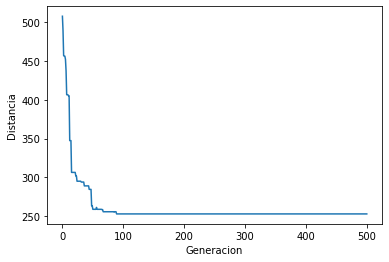

Distancia Final: 256.08310086597055


In [8]:
ListaCiudad = leer_coordenadas("coordenadas.txt")
cm = ConfigManager().update('notebook', {'limit_output': 1000})
with open("coordenadas.txt") as f:
    firstline = f.readline().rstrip()
ciudades = firstline

print("Coordenadas: ",ListaCiudad)
cities = []
for i in range(0,int(ciudades)-1):
    cities.append(Ciudad(x=int(ListaCiudad[i][0]), y=int(ListaCiudad[i][1])))

a,e = geneticAlgorithm(Poblacion=cities, popSize=100, TamanoElite=20, RangoMutacion=0.01, generations=500)



def PlotAlgoritmoGenetico(Poblacion, popSize, TamanoElite, RangoMutacion, generations):
    pop = PoblacionInicial(popSize, Poblacion)
    Progreso = []
    Progreso.append(1 / RangoRutas(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, TamanoElite, RangoMutacion)
        Progreso.append(1 / RangoRutas(pop)[0][1])
    
    plt.plot(Progreso)
    plt.ylabel('Distancia')
    plt.xlabel('Generacion')
    plt.show()

PlotAlgoritmoGenetico(Poblacion=cities, popSize=100, TamanoElite=20, RangoMutacion=0.01, generations=500)
print("Distancia Final: " + str(e))